In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Hypothesis Testing

* In Hypothesis testing, we will tackle the following questions:

  1. A measure of the difference between two groups
    * This is referred to as the `effect size`
    
  2. Variability of the difference measured 
    * How variable is the measured or inferred difference?
    
 3. Probabilities associated with the measured difference 
    * How likely is it that the difference is due to chance alone?
    * This is referred to as `p-value`

### How Important are `p-values`?

<img src="images/p_value.png" alt="drawing" style="width:500px;"/>



# Understanding the The Effect Size

* The effect size is a way of quantifying the difference between two groups

  * How different are group A and B?
  
  * What we are interested in is not the difference between the samples, but the difference between underlying populations
  

`male_height` $ \sim \mathcal{N}(\mu=177, \sigma = 7.1)$

`female_height` $ \sim \mathcal{N}(\mu=164, \sigma = 6.9)$
    


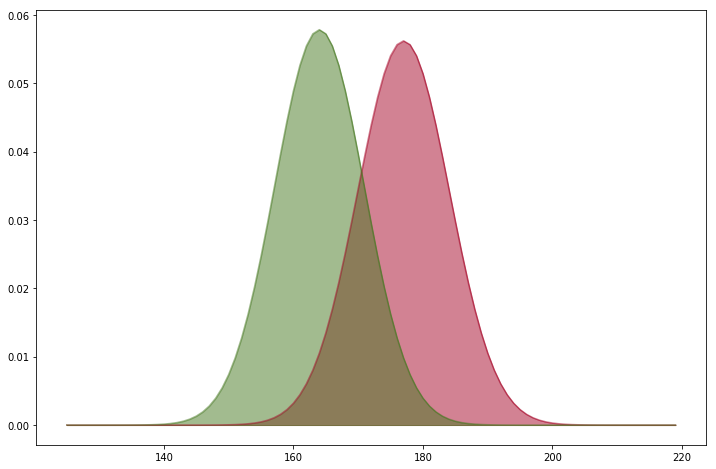

In [8]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
x = np.arange(125,220)

y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

plt.plot(x, y_male, color= "#A60628",  alpha=0.5)
plt.plot(x, y_female, "#467821", alpha=0.5 )

plt.fill_between(x, 0, y_male, color= "#A60628", alpha=0.5)
plt.fill_between(x, 0, y_female, color= "#467821", alpha=0.5)


### Difference in Heights across countries

* What does the effect size look like for differences in heights betwen females in Bolivia and in Bosnia and Herzegovina


`Bolivian females height` $ \sim \mathcal{N}(\mu=171.6, \sigma = 6.5)$

`Bosnian females heights` $ \sim \mathcal{N}(\mu=142, \sigma = 6.9)$




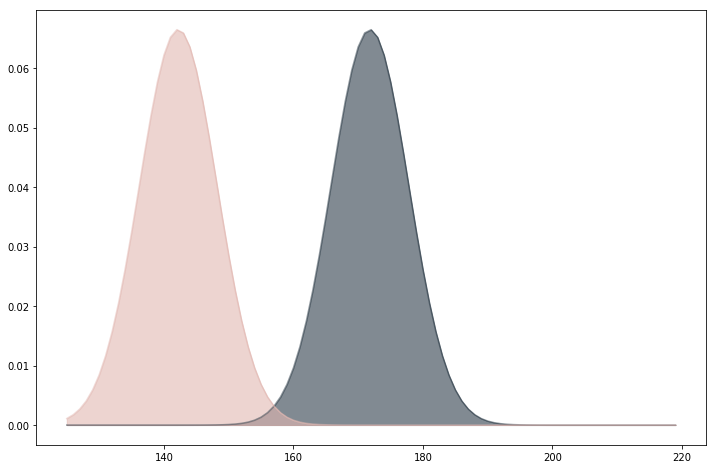

In [10]:
x = np.arange(125,220)

y_bosnia = norm.pdf(x, 171.8, 6)
y_bolivia = norm.pdf(x, 142.2, 6)

plt.figure(figsize=(12,8))

plt.plot(x, y_bosnia, color= "#2E3D49",  alpha=0.5)
plt.plot(x, y_bolivia, "#E2B8B2", alpha=0.5 )

plt.fill_between(x, 0, y_bosnia, color= "#2E3D49", alpha=0.6)
plt.fill_between(x, 0, y_bolivia, color= "#E2B8B2", alpha=0.6)


### Intuition Underlying Effect Size

* The effect size describes the overlap between the two distributions we need to compare

  * Small effect size suggests that there is a more significant overlap 
    * Can be harder to detect differences between two population

* Many methods to quantify the ovelap. 
* Ex. Using the misclassification rate
  * What is the rate of individuals in the first distribution that can be misclassified as originating in the second distribution and vice-versa

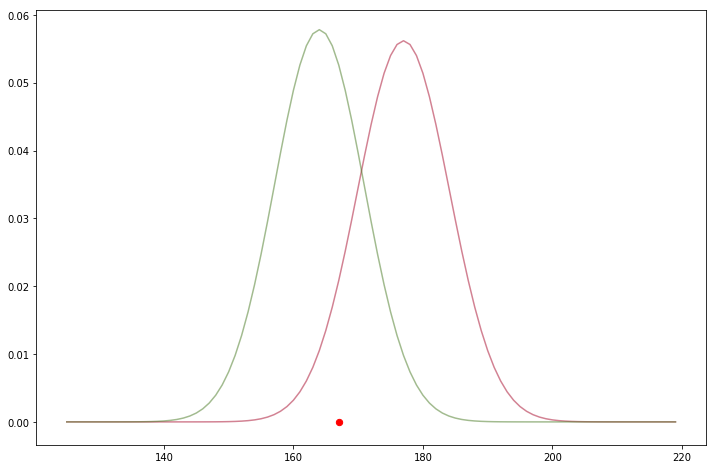

In [24]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
x = np.arange(125,220)

y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

plt.plot(x, y_male, color= "#A60628",  alpha=0.5)
plt.plot(x, y_female, "#467821", alpha=0.5 )

plt.scatter(167, 0, color="Red", s=40)




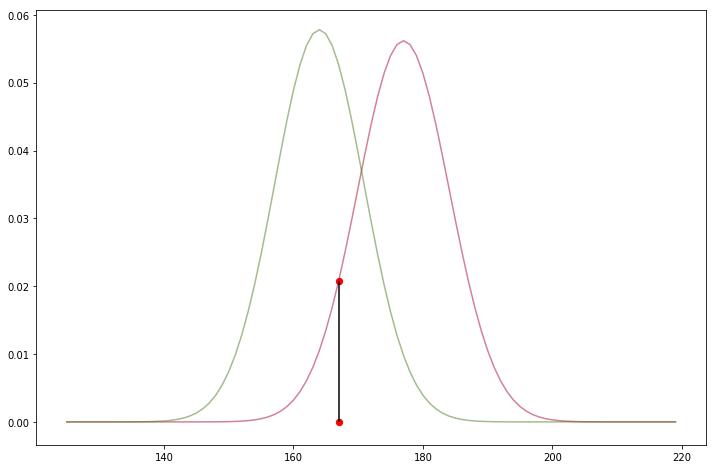

In [26]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
x = np.arange(125,220)

y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

plt.plot(x, y_male, color= "#A60628",  alpha=0.5)
plt.plot(x, y_female, "#467821", alpha=0.5 )

plt.scatter(167, 0, color="Red", s=40)


plt.vlines(167, 0, norm.pdf(167, 177, 7.1))
plt.scatter(167, norm.pdf(167, 177, 7.1), color="Red", s=40)


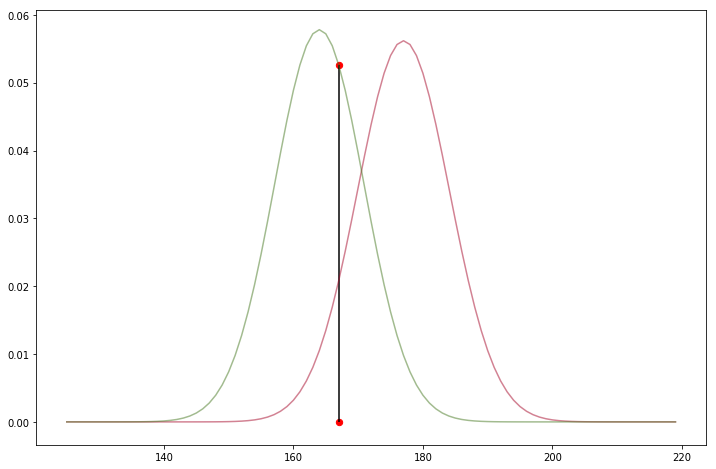

In [27]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
x = np.arange(125,220)

y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

plt.plot(x, y_male, color= "#A60628",  alpha=0.5)
plt.plot(x, y_female, "#467821", alpha=0.5 )

plt.scatter(167, 0, color="Red", s=40)


plt.vlines(167, 0, norm.pdf(167, 164, 6.9))
plt.scatter(167, norm.pdf(167, 164, 6.9), color="Red", s=40)


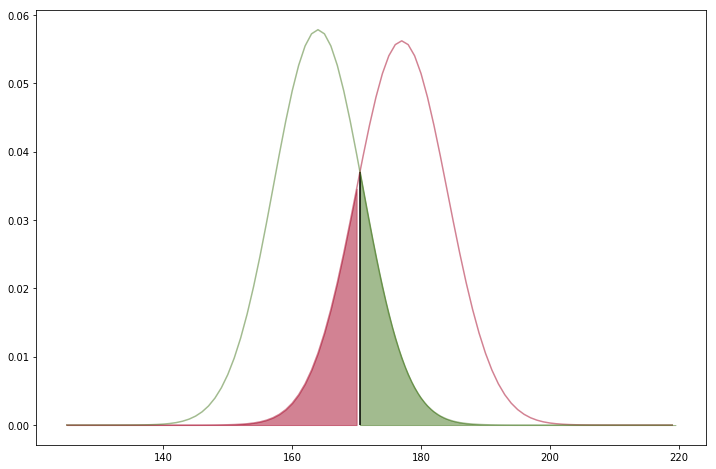

In [45]:
from scipy.stats import norm
plt.figure(figsize=(12,8))
x = np.arange(125,220)


y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)

intersect_mean = (177 + 164) / 2

plt.plot(x, y_male, color= "#A60628",  alpha=0.5)
plt.plot(x, y_female, "#467821", alpha=0.5 )
plt.vlines(intersect_mean, 0, norm.pdf(intersect_mean, 177, 7.1))


x_male_partial = np.arange(125,intersect_mean)
y_male_partial = norm.pdf(x_male_partial, 177, 7.1)
plt.fill_between(x_male_partial, 0, y_male_partial, color= "#A60628", alpha=0.5)



x_female_partial = np.arange(intersect_mean,220)
y_female_partial = norm.pdf(x_female_partial, 164, 6.9)
plt.fill_between(x_female, 0, y_female_partial, color= "#467821", alpha=0.5)


### Intuition Underlying Effect Size - Cont'd


* A more intuitive formulation is by using the probability of superiority

  * What is the probability that a randomly selected value in the right distribution is higher than a randomly selected value from the left distribution?

  * The smaller the overlap, the more likely that values from the left distribution will be higher than values on right distribution
  
* We can sample directly from the theoretical distribution


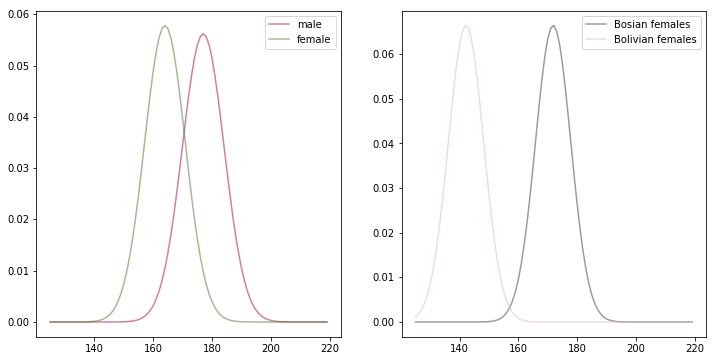

In [64]:
from scipy.stats import norm
plt.figure(figsize=(12,6))
plt.subplot(121)
x = np.arange(125,220)
y_male = norm.pdf(x, 177, 7.1)
y_female = norm.pdf(x, 164, 6.9)
plt.plot(x, y_male, color= "#A60628",  alpha=0.5, label="Male")
plt.plot(x, y_female, "#467821", alpha=0.5, label="Female")
plt.legend()

plt.subplot(122)
x = np.arange(125,220)
y_bosnia = norm.pdf(x, 171.8, 6)
y_bolivia = norm.pdf(x, 142.2, 6)
plt.plot(x, y_bosnia, color= "#2E3D49",  alpha=0.5, label="Bosian females")
plt.plot(x, y_bolivia, "#E2B8B2", alpha=0.5, label="Bolivian females")
plt.legend()


In [66]:
male_higher_female = [np.random.normal(177, 7.1) > np.random.normal(164, 6.9) for _ in range(100)]
male_higher_female[0:5]

[True, True, True, False, True]

In [74]:
male_higher_female = [np.random.normal(177, 7.1) > np.random.normal(164, 6.9) for _ in range(10000)]
sum(male_higher_female)/len(male_higher_female)

0.902